Importing libraries

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Q1
### Load the CSV file we provide into Python IDE using read_csv loading the file

In [283]:
# pylint: disable=E1101
data = pd.read_csv(r'C:\\Users\\Dell\\Desktop\\prices(1).csv')

## Q2
### Only keep the time series data for three tickers (AAPL, ABBV and ABC) and filter out the data of all the other tickers

In [284]:
#using .query from pandas to filter out data
data.query('ticker=="AAPL" or ticker == "ABBV" or ticker == "ABC"',inplace=True )

## Q3
### Assign “NA” value if the value of “close price” field is great than 10000 or less than 0

In [285]:
data['close price'] = data['close price'].apply(lambda x: np.nan if x>10000 or x<0 else x)

## Q4
### For each ticker, replace all the missing data in the dataset (also include the “NA” value from step 2) with the last valid

In [286]:
data.ffill(inplace=True)

## Q5
### Export a 4-column CSV file with the following format: column 1: Date, column 2: close price of AAPL, column 3: close price of ABBV; column 4: close price of ABC

In [287]:
#getting the unique dates from the table
df = pd.DataFrame(data=data.date.unique())

#extracting aapl ticker
aapl = data[data['ticker']=='AAPL']['close price'].tolist()
df['AAPL'] = aapl

#extracting abbv ticker
abbv = data[data['ticker']=='ABBV']['close price'].tolist()
df['ABBV'] = abbv

#extracting abc ticker
abc = data[data['ticker']=='ABC']['close price'].tolist()
df['ABC'] = abc

#renaming the 0th named column
df.rename(columns = {0:'Date'}, inplace = True)

#converting to csv
subset_stock_csv = df.to_csv()

## Q6
### Use “close price” at the month end (i.e., the last business day of each month) to calculate the monthly return for each stocks, e.g:
$the\ monthly\ return\ of\ July\ 2016 = \frac{close\ price\ of\ last\ business\ day\ of\ July\ 2016 - \ close\ price\ of\ last\ business\ day\ of\ June\ 2016}{close\ price\ of\ last\ business\ day\ of\ June}$

In [288]:
#defining a function that will return the name of the month, given a number
def month_name(x):
    if x==1:
        return "January"
    elif x == 2:
        return "February"
    elif x == 3:
        return "March"
    elif x == 4:
        return "April"
    elif x == 5:
        return "May"
    elif x == 6:
        return "June"
    elif x == 7:
        return "July"
    elif x == 8:
        return "August"
    elif x == 9:
        return "September"
    elif x == 10:
        return "October"
    elif x == 11:
        return "November"
    elif x == 12:
        return "December"

#making the dataframe into time series
df.index = pd.to_datetime(df['Date'])

#making the frequency og the grouper as month
df_eom = df.groupby(pd.Grouper(freq='1M')).last()

#getting the month from the index
df_eom['Date'] = pd.DatetimeIndex(df_eom['Date']).month

#applying the fucntion defined above to convert the number into month name
df_eom["Date"] = df_eom["Date"].apply(month_name)

#keeping the first row, since it will not be included in the calculation
aapl = [df_eom.loc['2015-06-30','AAPL']]
abbv = [df_eom.loc['2015-06-30','ABBV']]
abc = [df_eom.loc['2015-06-30','ABC']]

#looping the data frame leaving out the first row
#followed by the implementation of the formula given
for i in df_eom['Date'].index[1:]:
    aapl.append((df_eom.loc[i,'AAPL'] - df_eom.loc[i-1,'AAPL'])/df_eom.loc[i,'AAPL'])
    abbv.append((df_eom.loc[i,'ABBV'] - df_eom.loc[i-1,'ABBV'])/df_eom.loc[i,'ABBV'])
    abc.append((df_eom.loc[i,'ABC'] - df_eom.loc[i-1,'ABC'])/df_eom.loc[i,'ABC'])

#creating the dataframe
close_df = pd.DataFrame()
close_df['Date'] = df_eom["Date"].tolist()
close_df['AAPL'] = aapl
close_df['ABBV'] = abbv
close_df['ABC'] = abc

#dropping the first row, as it may create problems in the calculation
#since its values are significantly different to others
close_df = close_df.iloc[1: , :]

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`


## Q7
### Calculate:
- the cumulative return of the portfolio (either arithmetic or geometric) 
- calculate the (geometric) mean of monthly return and monthly volatility
- calculate the maximum drawdown for the whole time history

In [289]:
#calculate the cumulative return of the portfolio
portfolio_return = close_df.sum(axis=1)
cumulative_return = (portfolio_return + 1).cumprod()

#calculate the (geometric) mean of monthly return
geometric_return = np.prod(portfolio_return + 1) ** (close_df.shape[0]/portfolio_return.shape[0]) - 1

#calculate the montly volatility
annual_std = np.std(portfolio_return) * np.sqrt(close_df.shape[0])

#calculate the maximum drawdown for the whole time history 
drawdown =  1 - cumulative_return.div(cumulative_return.cummax())

## Q8
### Plot the time series of cumulative return for the three tickers and also calculate the 3x3 covariance matrix for monthly return series for the three tickers

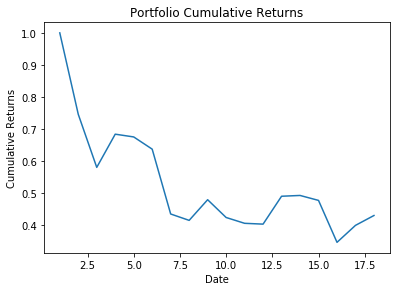

In [290]:
#using the pyplot to make the plot
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cumulative_return)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Portfolio Cumulative Returns")
plt.show();

In [291]:
#making three lists, and converting them into an array to get the covariance matrix
aapl = close_df['AAPL'].tolist()
abbv = close_df['ABBV'].tolist()
abc = close_df['ABC'].tolist()

datal = np.array([aapl,abbv,abc])
covMatrix = np.cov(datal,bias=True)
print (covMatrix)

[[5.18245482e-03 1.16340300e-03 7.48921802e-05]
 [1.16340300e-03 4.97509029e-03 2.95818262e-03]
 [7.48921802e-05 2.95818262e-03 5.14931839e-03]]
